# AutoData workspace

In [21]:
import autodata as ad
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read data

In [2]:
input_file = 'data/adult.csv'
data = ad.read_csv(input_file, sep=None, engine='python')

In [3]:
data.get_data('header')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.shape

(48842, 15)

In [5]:
data.set_class(['age', 'fnlwgt']) #['income', 'gender']
data.train_test_split(test_size=0.2)

In [6]:
data.get_data('X_header')
data.get_data('categorical_header')
#data.get_data('y_test')
#data.get_data('numerical_header')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


# Processings

In [7]:
data = data.imputation()
data = data.encoding('label', 'categorical')
data = data.normalization('min-max')

# Visualization

y set plot
TODO: class coloration


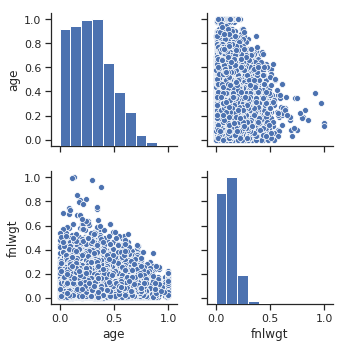

In [10]:
data.plot('y')

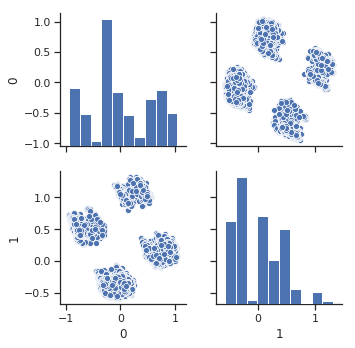

In [12]:
data.pca(n_components=2).plot()

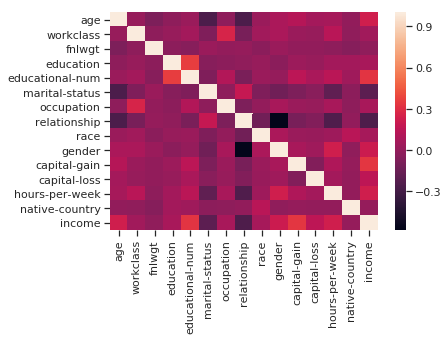

In [13]:
data.correlation()

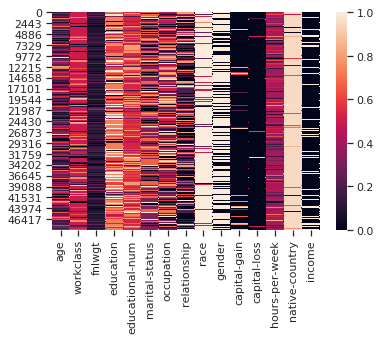

In [14]:
data.heatmap()

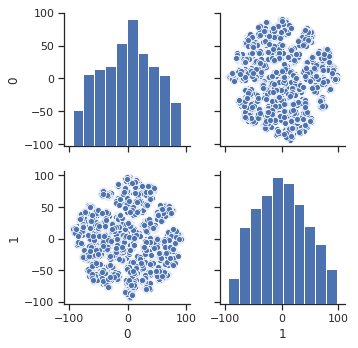

In [15]:
data.get_data('X_test').tsne().plot()

In [16]:
data.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,0.483805,0.120004,0.685895,0.605206,0.436458,0.469836,0.288657,0.917013,0.668482,0.054766,0.022797,0.414702,0.896326,0.239282
std,0.187815,0.183029,0.071445,0.258299,0.171398,0.251284,0.302179,0.320430,0.211497,0.470764,0.197098,0.111163,0.129424,0.189643,0.426649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.500000,0.071216,0.600000,0.533333,0.333333,0.214286,0.000000,1.000000,0.000000,0.000000,0.000000,0.410526,0.951220,0.000000
50%,0.273973,0.500000,0.112210,0.733333,0.600000,0.333333,0.500000,0.200000,1.000000,1.000000,0.000000,0.000000,0.410526,0.951220,0.000000
75%,0.424658,0.500000,0.152462,0.800000,0.733333,0.666667,0.714286,0.600000,1.000000,1.000000,0.000000,0.000000,0.463158,0.951220,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Benchmark

In [17]:
data.score()

0.31274784475040207

In [19]:
data.set_class('income')
data.score()

0.8523599877137299